In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Visualization for mac performance using 1000*1000 grid


## Single thread

In [27]:
# Set style for better-looking charts
plt.style.use('ggplot')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)

In [28]:
# Define grid sizes for all benchmarks
grid_sizes = [100, 200, 500, 1000, 2000]

#iteration=1000
#nRuns=10

# Sample data from benchmarks - replace with your actual measurements
# Format: [setup_time, avg_iter_time, min_iter_time, max_iter_time, total_time]
baseline_data = {
    100: [0.0157959 , 0.00413903, 0.0038039,0.0291207, 4.13903],
    200: [0.0647583, 0.0172309, 0.0158084, 0.063679, 17.2309],
    500: [0.344296, 0.0976958, 0.0890957, 0.376212,  97.6958],
    1000: [1.5697, 0.439495, 0.386033, 2.47662, 439.495],
    2000: [6.60329, 2.44691, 2.14705, 9.96488, 2446.91]
}

optimized_v1_data = {
    100: [0.0242084, 0.0052165, 0.0046289, 0.0402669, 5.2165],
    200: [0.0392083, 0.0153531, 0.0136705, 0.0671081, 15.3531],
    500: [0.369879, 0.087371,0.0840456, 0.203104, 87.371 ],
    1000: [1.32165, 0.39334, 0.371479, 0.889954, 393.34],
    2000: [5.84044,1.89248, 1.71461, 10.7855, 1892.48]
}

optimized_v2_data = {
    100: [0.0111833, 0.00437761,0.0040247,0.0286503, 4.37761],
    200: [0.05135, 0.0150205, 0.0139749, 0.0711208, 15.0205],
    500: [0.341037, 0.0880404, 0.0840539, 0.234804, 88.0404],
    1000: [1.23857, 0.399554, 0.372379, 0.988375, 399.554],
    2000: [6.35119, 1.95375, 1.71712, 10.7945, 1953.75]
}

optimized_v3_data = {
    100: [0.0158459, 0.00580263, 0.0052455, 0.0274124, 5.80263],
    200: [0.0524626,0.0211902, 0.0194541, 0.077100, 21.1902],
    500: [0.320146, 0.128837, 0.119142, 0.408063, 128.837],
    1000: [1.42408, 0.701702, 0.617392, 1.67213, 701.702],
    2000: [6.26005, 4.95803, 4.1602, 26.0489, 4958.03]
}

In [29]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'Grid Size': grid_sizes * 4,
    'Implementation': ['Baseline'] * 5 + ['Optimized v1'] * 5 + ['Optimized v2'] * 5 + ['Optimized v3'] * 5,
    'Setup Time (μs)': [baseline_data[s][0] *1000 for s in grid_sizes] + 
                      [optimized_v1_data[s][0] *1000 for s in grid_sizes] + 
                      [optimized_v2_data[s][0]*1000  for s in grid_sizes] + 
                      [optimized_v3_data[s][0]*1000  for s in grid_sizes],
    'Avg Iter Time (μs)': [baseline_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][1]*1000 for s in grid_sizes],
    'Min Iter Time (μs)': [baseline_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][2]*1000 for s in grid_sizes],
    'Max Iter Time (μs)': [baseline_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][3]*1000 for s in grid_sizes],
    'Total Time (ms)': [baseline_data[s][4] for s in grid_sizes] + 
                      [optimized_v1_data[s][4] for s in grid_sizes] + 
                      [optimized_v2_data[s][4] for s in grid_sizes] + 
                      [optimized_v3_data[s][4] for s in grid_sizes]
})


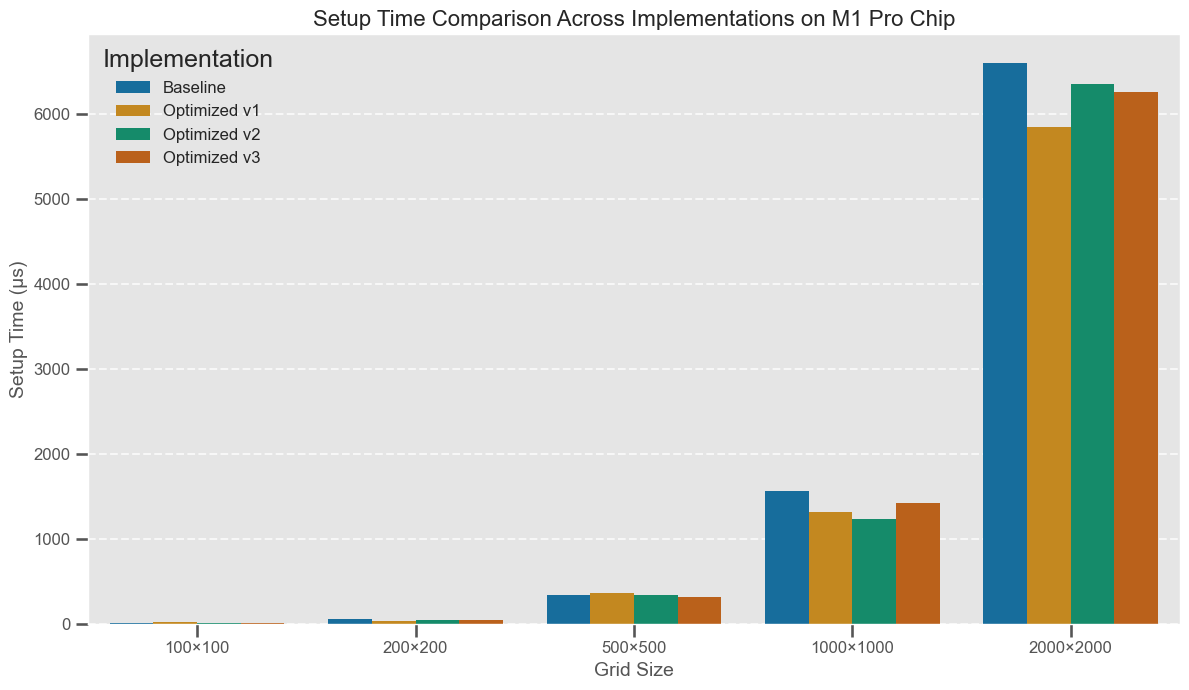

In [30]:
# 1. Setup Time Comparison
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Grid Size', y='Setup Time (μs)', hue='Implementation')
plt.title('Setup Time Comparison Across Implementations on M1 Pro Chip', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Setup Time (μs)', fontsize=14)
plt.xticks(ticks=range(5), labels=[f'{s}×{s}' for s in grid_sizes])
plt.legend(title='Implementation', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

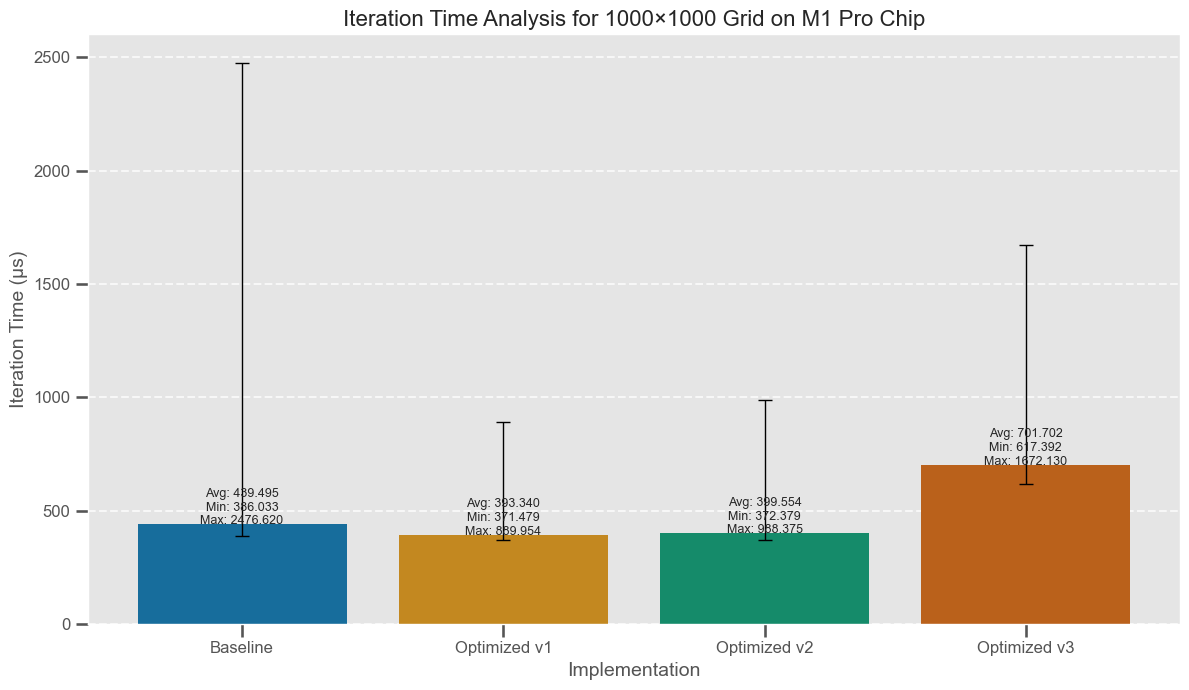

In [31]:
# 2. Iteration Time with Min/Max Range
plt.figure(figsize=(12, 7))

# Filter for 1000×1000 grid size for detailed analysis
df_1000 = df[df['Grid Size'] == 1000]

# Create error bars for min/max
yerr_min = df_1000['Avg Iter Time (μs)'] - df_1000['Min Iter Time (μs)']
yerr_max = df_1000['Max Iter Time (μs)'] - df_1000['Avg Iter Time (μs)']
yerr = np.array([yerr_min, yerr_max])

# Bar chart with error bars
ax = sns.barplot(data=df_1000, x='Implementation', y='Avg Iter Time (μs)', palette='colorblind')

# Add error bars
x_pos = np.arange(len(df_1000['Implementation']))
plt.errorbar(x=x_pos, y=df_1000['Avg Iter Time (μs)'], yerr=yerr, fmt='none', capsize=5, ecolor='black', elinewidth=1, label='Min/Max Range')

plt.title('Iteration Time Analysis for 1000×1000 Grid on M1 Pro Chip', fontsize=16)
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Iteration Time (μs)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    min_val = df_1000.iloc[i]['Min Iter Time (μs)']
    max_val = df_1000.iloc[i]['Max Iter Time (μs)']
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'Avg: {height:.3f}\nMin: {min_val:.3f}\nMax: {max_val:.3f}',
            ha='center', fontsize=9)

plt.tight_layout()
plt.show()

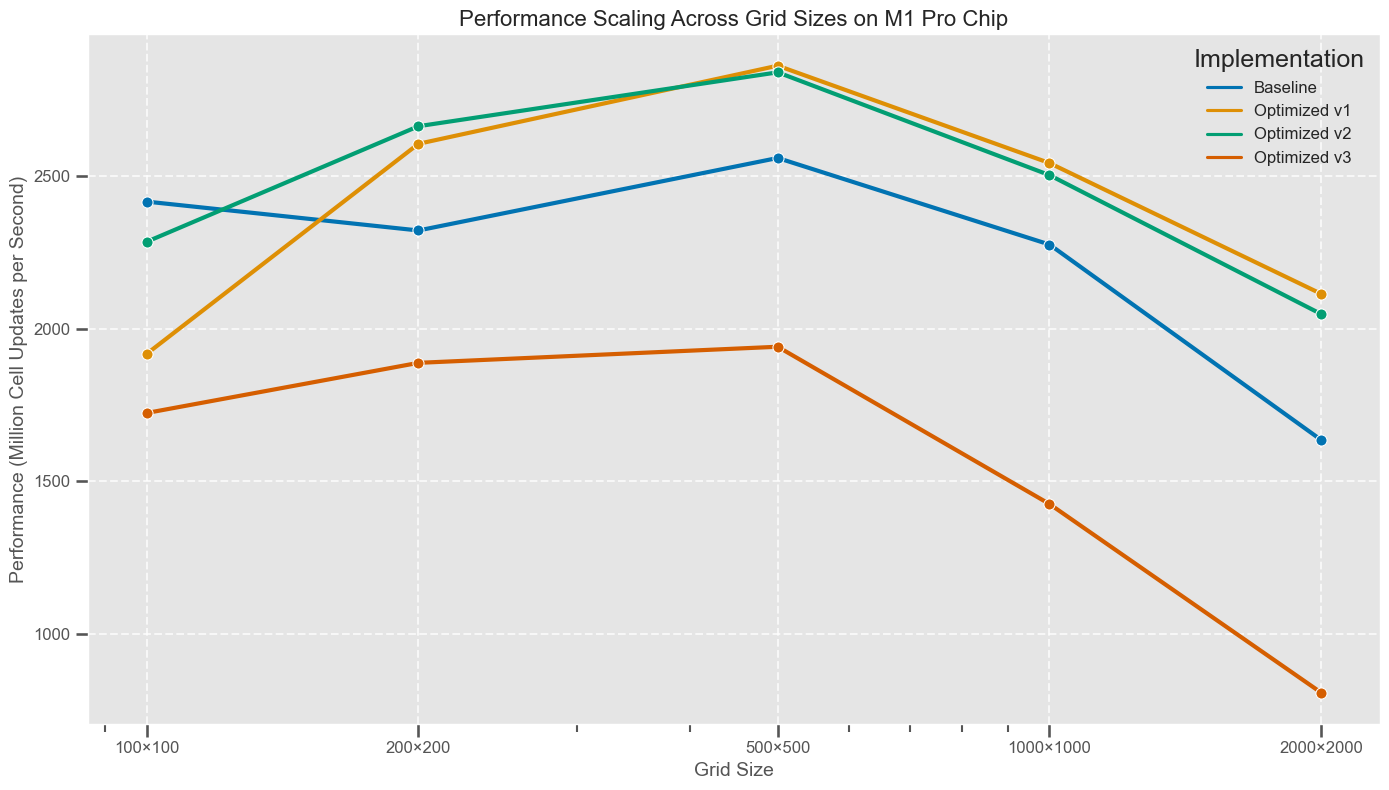

In [32]:
# 3. Performance scaling across grid sizes
plt.figure(figsize=(14, 8))

# Calculate performance in cell updates per second
for idx, row in df.iterrows():
    grid_size = row['Grid Size']
    df.loc[idx, 'Performance (MCUPS)'] = (grid_size * grid_size * 1000) / (row['Avg Iter Time (μs)']/1000 * 1e6)

sns.lineplot(data=df, x='Grid Size', y='Performance (MCUPS)', hue='Implementation', 
             marker='o', markersize=8, linewidth=3)

plt.title('Performance Scaling Across Grid Sizes on M1 Pro Chip', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Performance (Million Cell Updates per Second)', fontsize=14)
plt.xscale('log')
plt.xticks(grid_sizes, [f'{s}×{s}' for s in grid_sizes])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Implementation', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

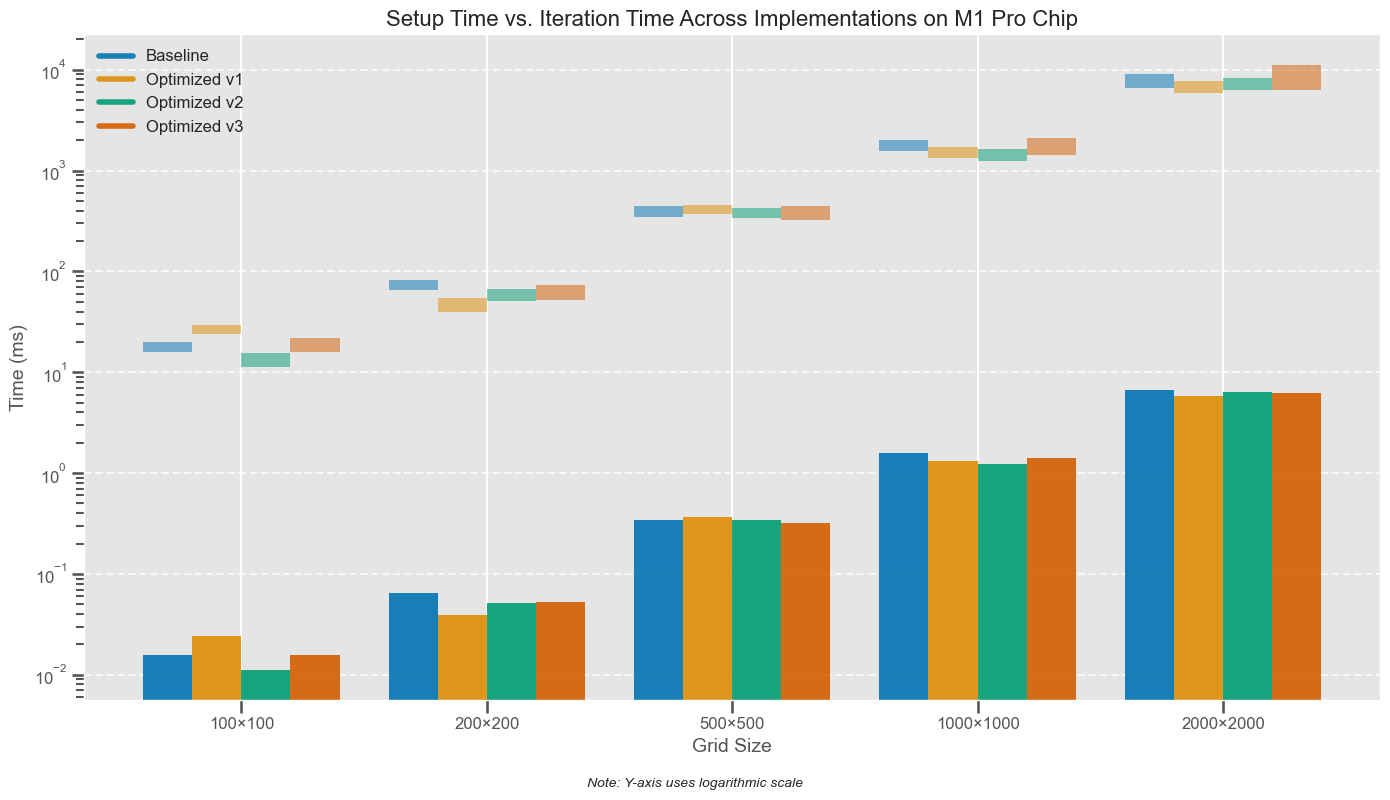

In [33]:
# 4. Combined visualization of setup and iteration time
plt.figure(figsize=(14, 10))

# Prepare data for stacked chart
setup_data = df.pivot(index='Grid Size', columns='Implementation', values='Setup Time (μs)')
iter_data = df.pivot(index='Grid Size', columns='Implementation', values='Total Time (ms)')

# Convert to numpy arrays for easier manipulation
setup_vals = setup_data.to_numpy()
iter_vals = iter_data.to_numpy()

# Grid size labels
grid_labels = [f'{s}×{s}' for s in grid_sizes]

# Bar positions
bar_width = 0.2
r1 = np.arange(len(grid_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create stacked bars
fig, ax = plt.subplots(figsize=(14, 8))

# Baseline
p1 = ax.bar(r1, setup_data['Baseline']/1000, bar_width, label='Baseline Setup', color='#0173b2', alpha=0.9)
p2 = ax.bar(r1, iter_data['Baseline'], bar_width, bottom=setup_data['Baseline'], 
            label='Baseline Iteration', color='#0173b2', alpha=0.5)

# Optimized v1
p3 = ax.bar(r2, setup_data['Optimized v1']/1000, bar_width, label='Optimized v1 Setup', color='#de8f05', alpha=0.9)
p4 = ax.bar(r2, iter_data['Optimized v1'], bar_width, bottom=setup_data['Optimized v1'], 
            label='Optimized v1 Iteration', color='#de8f05', alpha=0.5)

# Optimized v2
p5 = ax.bar(r3, setup_data['Optimized v2']/1000, bar_width, label='Optimized v2 Setup', color='#029e73', alpha=0.9)
p6 = ax.bar(r3, iter_data['Optimized v2'], bar_width, bottom=setup_data['Optimized v2'], 
            label='Optimized v2 Iteration', color='#029e73', alpha=0.5)

# Optimized v3
p7 = ax.bar(r4, setup_data['Optimized v3']/1000, bar_width, label='Optimized v3 Setup', color='#d55e00', alpha=0.9)
p8 = ax.bar(r4, iter_data['Optimized v3'], bar_width, bottom=setup_data['Optimized v3'], 
            label='Optimized v3 Iteration', color='#d55e00', alpha=0.5)

# Add labels and title
ax.set_xlabel('Grid Size', fontsize=14)
ax.set_ylabel('Time (ms)', fontsize=14)
ax.set_title('Setup Time vs. Iteration Time Across Implementations on M1 Pro Chip', fontsize=16)
ax.set_xticks([r + bar_width*1.5 for r in range(len(grid_sizes))])
ax.set_xticklabels(grid_labels)

# Add legend with grouped items
handles = [
    (p1[0], p2[0]), 
    (p3[0], p4[0]),
    (p5[0], p6[0]),
    (p7[0], p8[0])
]
labels = ['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']

# Use logarithmic scale for large values
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = []
for i, impl in enumerate(['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']):
    color = [p1[0], p3[0], p5[0], p7[0]][i].get_facecolor()
    legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=impl))

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

# Add note about logarithmic scale
plt.figtext(0.5, 0.01, "Note: Y-axis uses logarithmic scale", ha="center", fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


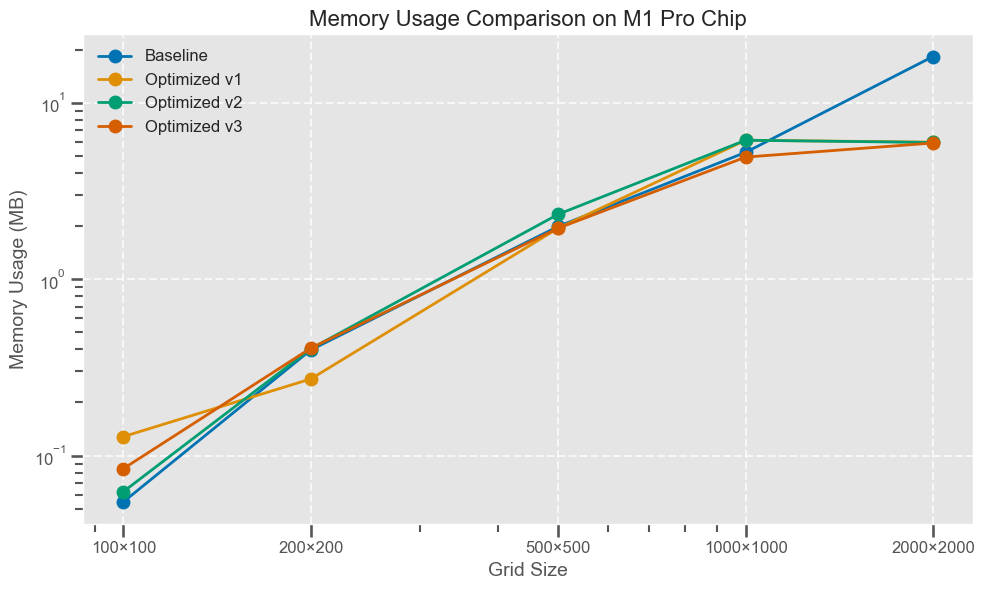

In [34]:
# Memory usage visualization
# Replace with your actual memory measurements in kB
memory_usage = {
    'Baseline': [56, 406.4, 2040, 5360, 18708.8],
    'Optimized v1': [131.2, 278.4, 1993.6 , 6278.4, 6124.8],
    'Optimized v2': [64,  412.8 , 2390.4,  6281.6, 6097.6], 
    'Optimized v3': [86.4, 416, 1993.6, 5038.4 , 6054.4]  
}

# Convert to MB for readability
for impl in memory_usage:
    memory_usage[impl] = [m/1024 for m in memory_usage[impl]]

fig, ax = plt.subplots(figsize=(10, 6))

for impl, mem in memory_usage.items():
    ax.plot(grid_sizes, mem, 'o-', linewidth=2, label=impl)

ax.set_xlabel('Grid Size', fontsize=14)
ax.set_ylabel('Memory Usage (MB)', fontsize=14)
ax.set_title('Memory Usage Comparison on M1 Pro Chip', fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(grid_sizes)
ax.set_xticklabels([f'{size}×{size}' for size in grid_sizes])
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Parallelism


In [35]:
## Note that openmp thread number will not change on my m1 Pro chip

In [36]:
# # ----- 1. OpenMP SCALING -----
# # Number of threads
# openmp_threads = [1, 2, 4, 8, 16]

# # Performance data for OpenMP (MCUPS - Million Cell Updates Per Second)
# # Format: [grid_size][threads] = performance
# openmp_perf = {
#     500: [120.5, 235.2, 452.1, 781.3, 923.7],
#     1000: [118.2, 230.1, 447.8, 770.2, 905.1],
#     2000: [116.7, 226.5, 438.6, 752.8, 880.3]
# }


In [37]:
# # Create figure for OpenMP scaling
# plt.figure(figsize=(12, 7))

# for size in openmp_perf:
#     plt.plot(openmp_threads, openmp_perf[size], 'o-', linewidth=2, 
#              label=f'{size}×{size} Grid')

# # Add speedup reference line (perfect scaling)
# ideal = [openmp_perf[2000][0] * t for t in openmp_threads]
# plt.plot(openmp_threads, ideal, '--', color='gray', label='Ideal Scaling')

# plt.title('OpenMP Performance Scaling on macOS', fontsize=16)
# plt.xlabel('Number of Threads', fontsize=14)
# plt.ylabel('Performance (MCUPS)', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()

# # Calculate parallel efficiency
# plt.figure(figsize=(12, 7))
# for size in openmp_perf:
#     efficiency = [openmp_perf[size][i] / (openmp_perf[size][0] * openmp_threads[i]) * 100 
#                   for i in range(len(openmp_threads))]
#     plt.plot(openmp_threads, efficiency, 'o-', linewidth=2, 
#              label=f'{size}×{size} Grid')

# plt.axhline(y=100, color='gray', linestyle='--', label='Ideal Efficiency')
# plt.title('OpenMP Parallel Efficiency on macOS', fontsize=16)
# plt.xlabel('Number of Threads', fontsize=14)
# plt.ylabel('Parallel Efficiency (%)', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()

In [40]:
# Function to convert cell updates per second to Million Cell Updates Per Second (MCUPS)
def to_mcups(cells_per_second):
    return cells_per_second / 1e6  # Convert to millions

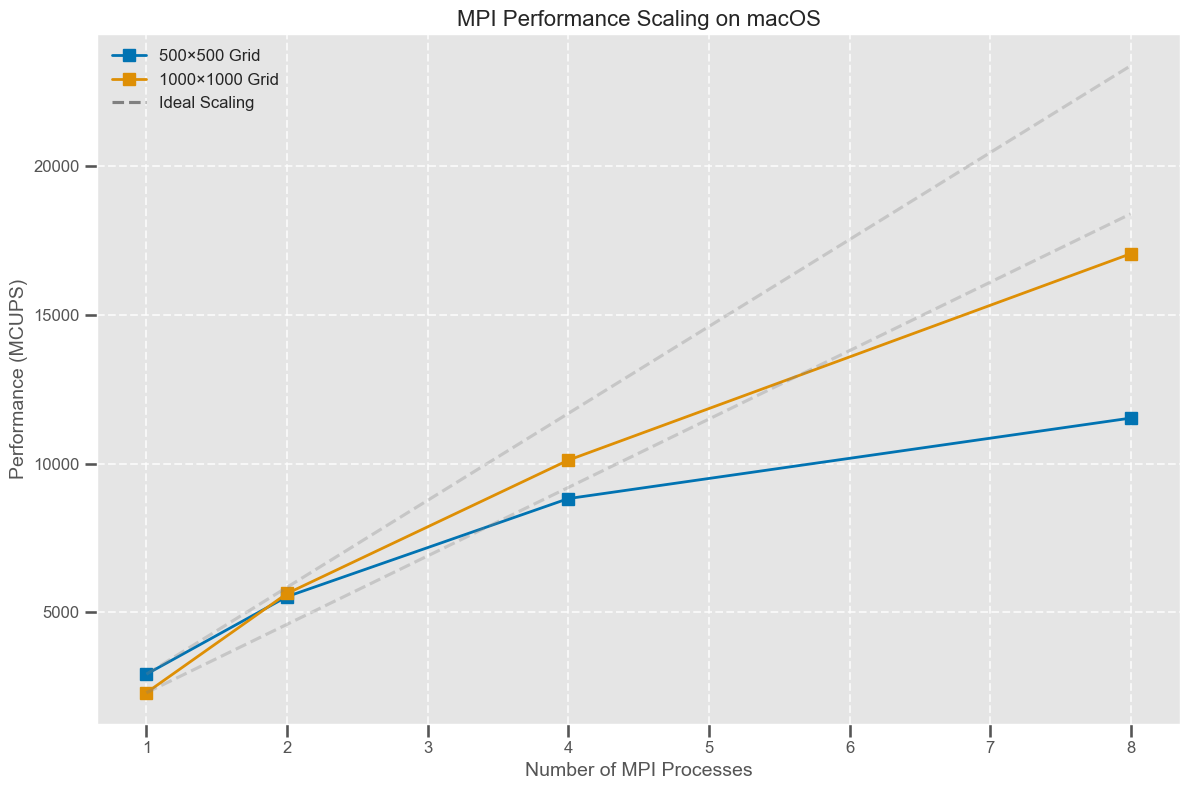

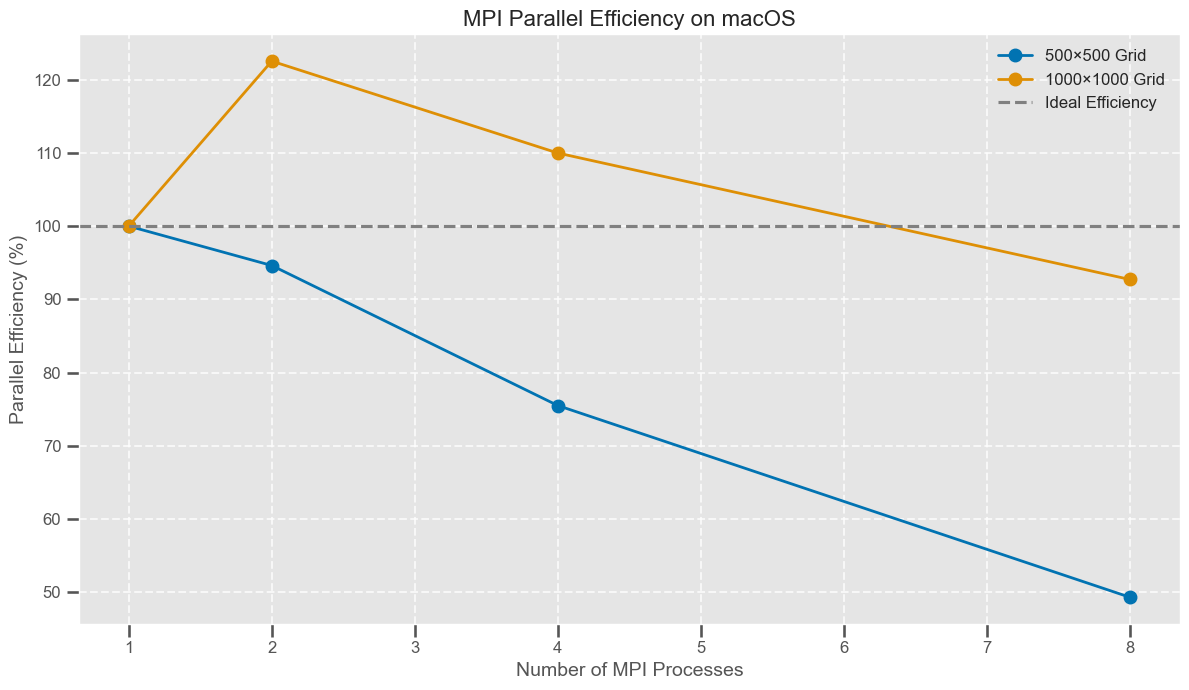

In [42]:
# Number of processes
mpi_processes = [1, 2, 4, 8]

## nruns=5 
## iteration=1000

# Performance data for MPI (MCUPS)
mpi_raw_perf = {
    500: [2.92131e+09,  5.52851e+09, 8.823e+09, 1.15285e+10 ],
    1000: [2.29899e+9, 5.6337e+09, 1.01137e+10, 1.7052e+10]
}

mpi_perf = {}
for size, perf_list in mpi_raw_perf.items():
    mpi_perf[size] = [to_mcups(perf) for perf in perf_list]

# Plot performance lines
for size in mpi_perf:
    plt.plot(mpi_processes, mpi_perf[size], 's-', linewidth=2, 
             label=f'{size}×{size} Grid')

# Add speedup reference line based on first process performance
for size in mpi_perf:
    ideal = [mpi_perf[size][0] * p for p in mpi_processes]
    plt.plot(mpi_processes, ideal, '--', color='gray', alpha=0.3)

# Add a single ideal scaling line for legend
ideal_ref = [mpi_perf[list(mpi_perf.keys())[0]][0] * p for p in mpi_processes]
plt.plot([], [], '--', color='gray', label='Ideal Scaling')

plt.title('MPI Performance Scaling on macOS', fontsize=16)
plt.xlabel('Number of MPI Processes', fontsize=14)
plt.ylabel('Performance (MCUPS)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Calculate and display efficiency
plt.figure(figsize=(12, 7))
for size in mpi_perf:
    efficiency = [mpi_perf[size][i] / (mpi_perf[size][0] * mpi_processes[i]) * 100 
                  for i in range(len(mpi_processes))]
    plt.plot(mpi_processes, efficiency, 'o-', linewidth=2, 
             label=f'{size}×{size} Grid')

plt.axhline(y=100, color='gray', linestyle='--', label='Ideal Efficiency')
plt.title('MPI Parallel Efficiency on macOS', fontsize=16)
plt.xlabel('Number of MPI Processes', fontsize=14)
plt.ylabel('Parallel Efficiency (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Docker Linux Visualization

## single thread

In [44]:
plt.style.use('ggplot')
sns.set_palette("colorblind")

In [ ]:
#nruns=10
#iteration=100


In [ ]:
baseline_data = {
    100: [ 0.0095919 ,  0.00464562, 0.0042875,0.0127624 , 0.464562],
    200: [0.0358165, 0.0172309, 0.0158084, 0.0334043, 1.72161],
    500: [0.344296, 0.0976958, 0.0890957, 0.376212,  97.6958],
    1000: [1.5697, 0.439495, 0.386033, 2.47662, 439.495]
}



optimized_v2_data = {
    100: [0.0111833, 0.00437761,0.0040247,0.0286503, 4.37761],
    200: [0.05135, 0.0150205, 0.0139749, 0.0711208, 15.0205],
    500: [0.341037, 0.0880404, 0.0840539, 0.234804, 88.0404],
    1000: [1.23857, 0.399554, 0.372379, 0.988375, 399.554]
}



In [ ]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'Grid Size': grid_sizes * 4,
    'Implementation': ['Baseline'] * 5 + ['Optimized v1'] * 5 + ['Optimized v2'] * 5 + ['Optimized v3'] * 5,
    'Setup Time (μs)': [baseline_data[s][0] *1000 for s in grid_sizes] + 
                      [optimized_v1_data[s][0] *1000 for s in grid_sizes] + 
                      [optimized_v2_data[s][0]*1000  for s in grid_sizes] + 
                      [optimized_v3_data[s][0]*1000  for s in grid_sizes],
    'Avg Iter Time (μs)': [baseline_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][1]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][1]*1000 for s in grid_sizes],
    'Min Iter Time (μs)': [baseline_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][2]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][2]*1000 for s in grid_sizes],
    'Max Iter Time (μs)': [baseline_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v1_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v2_data[s][3]*1000 for s in grid_sizes] + 
                         [optimized_v3_data[s][3]*1000 for s in grid_sizes],
    'Total Time (ms)': [baseline_data[s][4] for s in grid_sizes] + 
                      [optimized_v1_data[s][4] for s in grid_sizes] + 
                      [optimized_v2_data[s][4] for s in grid_sizes] + 
                      [optimized_v3_data[s][4] for s in grid_sizes]
})

In [ ]:
# 1. Setup Time Comparison
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Grid Size', y='Setup Time (μs)', hue='Implementation')
plt.title('Setup Time Comparison Across Implementations on M1 Pro Chip', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Setup Time (μs)', fontsize=14)
plt.xticks(ticks=range(5), labels=[f'{s}×{s}' for s in grid_sizes])
plt.legend(title='Implementation', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Iteration Time with Min/Max Range
plt.figure(figsize=(12, 7))

# Filter for 1000×1000 grid size for detailed analysis
df_1000 = df[df['Grid Size'] == 1000]

# Create error bars for min/max
yerr_min = df_1000['Avg Iter Time (μs)'] - df_1000['Min Iter Time (μs)']
yerr_max = df_1000['Max Iter Time (μs)'] - df_1000['Avg Iter Time (μs)']
yerr = np.array([yerr_min, yerr_max])

# Bar chart with error bars
ax = sns.barplot(data=df_1000, x='Implementation', y='Avg Iter Time (μs)', palette='colorblind')

# Add error bars
x_pos = np.arange(len(df_1000['Implementation']))
plt.errorbar(x=x_pos, y=df_1000['Avg Iter Time (μs)'], yerr=yerr, fmt='none', capsize=5, ecolor='black', elinewidth=1, label='Min/Max Range')

plt.title('Iteration Time Analysis for 1000×1000 Grid on M1 Pro Chip', fontsize=16)
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Iteration Time (μs)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    min_val = df_1000.iloc[i]['Min Iter Time (μs)']
    max_val = df_1000.iloc[i]['Max Iter Time (μs)']
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'Avg: {height:.3f}\nMin: {min_val:.3f}\nMax: {max_val:.3f}',
            ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# 3. Performance scaling across grid sizes
plt.figure(figsize=(14, 8))

# Calculate performance in cell updates per second
for idx, row in df.iterrows():
    grid_size = row['Grid Size']
    df.loc[idx, 'Performance (MCUPS)'] = (grid_size * grid_size * 1000) / (row['Avg Iter Time (μs)']/1000 * 1e6)

sns.lineplot(data=df, x='Grid Size', y='Performance (MCUPS)', hue='Implementation', 
             marker='o', markersize=8, linewidth=3)

plt.title('Performance Scaling Across Grid Sizes on M1 Pro Chip', fontsize=16)
plt.xlabel('Grid Size', fontsize=14)
plt.ylabel('Performance (Million Cell Updates per Second)', fontsize=14)
plt.xscale('log')
plt.xticks(grid_sizes, [f'{s}×{s}' for s in grid_sizes])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Implementation', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Combined visualization of setup and iteration time
plt.figure(figsize=(14, 10))

# Prepare data for stacked chart
setup_data = df.pivot(index='Grid Size', columns='Implementation', values='Setup Time (μs)')
iter_data = df.pivot(index='Grid Size', columns='Implementation', values='Total Time (ms)')

# Convert to numpy arrays for easier manipulation
setup_vals = setup_data.to_numpy()
iter_vals = iter_data.to_numpy()

# Grid size labels
grid_labels = [f'{s}×{s}' for s in grid_sizes]

# Bar positions
bar_width = 0.2
r1 = np.arange(len(grid_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create stacked bars
fig, ax = plt.subplots(figsize=(14, 8))

# Baseline
p1 = ax.bar(r1, setup_data['Baseline']/1000, bar_width, label='Baseline Setup', color='#0173b2', alpha=0.9)
p2 = ax.bar(r1, iter_data['Baseline'], bar_width, bottom=setup_data['Baseline'], 
            label='Baseline Iteration', color='#0173b2', alpha=0.5)

# Optimized v1
p3 = ax.bar(r2, setup_data['Optimized v1']/1000, bar_width, label='Optimized v1 Setup', color='#de8f05', alpha=0.9)
p4 = ax.bar(r2, iter_data['Optimized v1'], bar_width, bottom=setup_data['Optimized v1'], 
            label='Optimized v1 Iteration', color='#de8f05', alpha=0.5)

# Optimized v2
p5 = ax.bar(r3, setup_data['Optimized v2']/1000, bar_width, label='Optimized v2 Setup', color='#029e73', alpha=0.9)
p6 = ax.bar(r3, iter_data['Optimized v2'], bar_width, bottom=setup_data['Optimized v2'], 
            label='Optimized v2 Iteration', color='#029e73', alpha=0.5)

# Optimized v3
p7 = ax.bar(r4, setup_data['Optimized v3']/1000, bar_width, label='Optimized v3 Setup', color='#d55e00', alpha=0.9)
p8 = ax.bar(r4, iter_data['Optimized v3'], bar_width, bottom=setup_data['Optimized v3'], 
            label='Optimized v3 Iteration', color='#d55e00', alpha=0.5)

# Add labels and title
ax.set_xlabel('Grid Size', fontsize=14)
ax.set_ylabel('Time (ms)', fontsize=14)
ax.set_title('Setup Time vs. Iteration Time Across Implementations on M1 Pro Chip', fontsize=16)
ax.set_xticks([r + bar_width*1.5 for r in range(len(grid_sizes))])
ax.set_xticklabels(grid_labels)

# Add legend with grouped items
handles = [
    (p1[0], p2[0]), 
    (p3[0], p4[0]),
    (p5[0], p6[0]),
    (p7[0], p8[0])
]
labels = ['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']

# Use logarithmic scale for large values
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = []
for i, impl in enumerate(['Baseline', 'Optimized v1', 'Optimized v2', 'Optimized v3']):
    color = [p1[0], p3[0], p5[0], p7[0]][i].get_facecolor()
    legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=impl))

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

# Add note about logarithmic scale
plt.figtext(0.5, 0.01, "Note: Y-axis uses logarithmic scale", ha="center", fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


## Profiling results

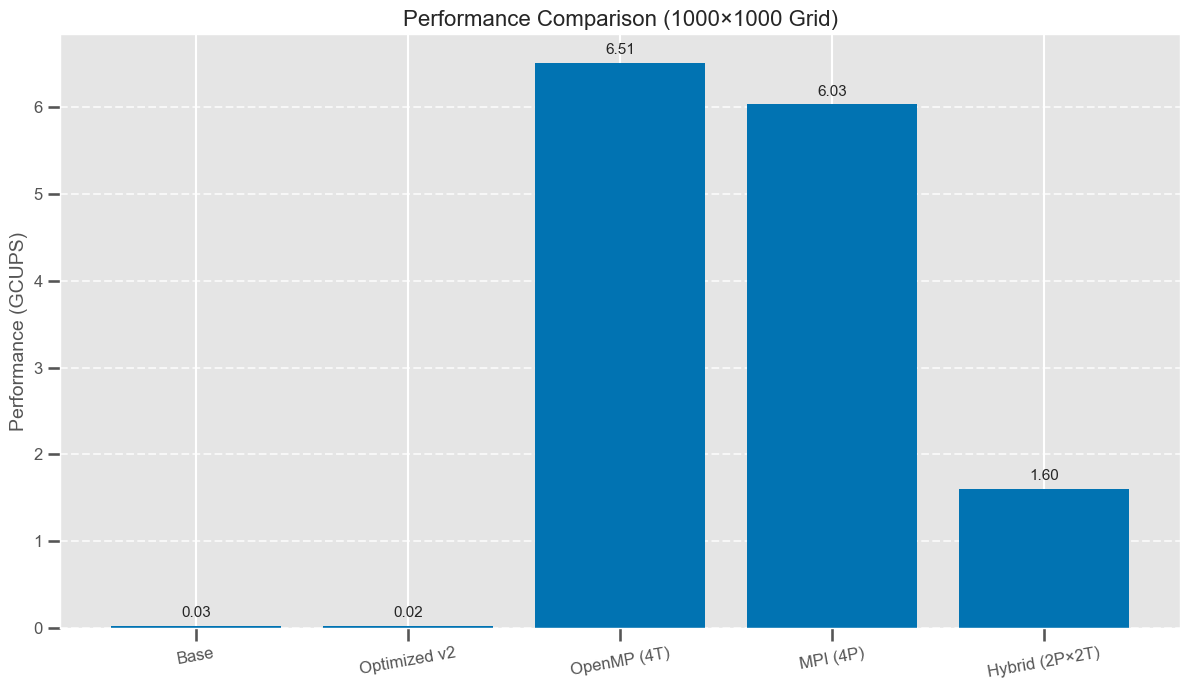

In [43]:
# Performance data for 1000×1000 grid (cell updates per second)
implementations = ['Base', 'Optimized v2', 'OpenMP (4T)', 'MPI (4P)', 'Hybrid (2P×2T)']
performance = [2.55e+07, 2.48e+07, 6.51e+09, 6.03e+09, 1.60e+09]

# Convert to GCUPS (Billion Cell Updates Per Second) for readability
performance_gcups = [p/1e9 for p in performance]

plt.figure(figsize=(12, 7))
bars = plt.bar(implementations, performance_gcups)
plt.title('Performance Comparison (1000×1000 Grid)', fontsize=16)
plt.ylabel('Performance (GCUPS)', fontsize=14)
plt.xticks(fontsize=12, rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

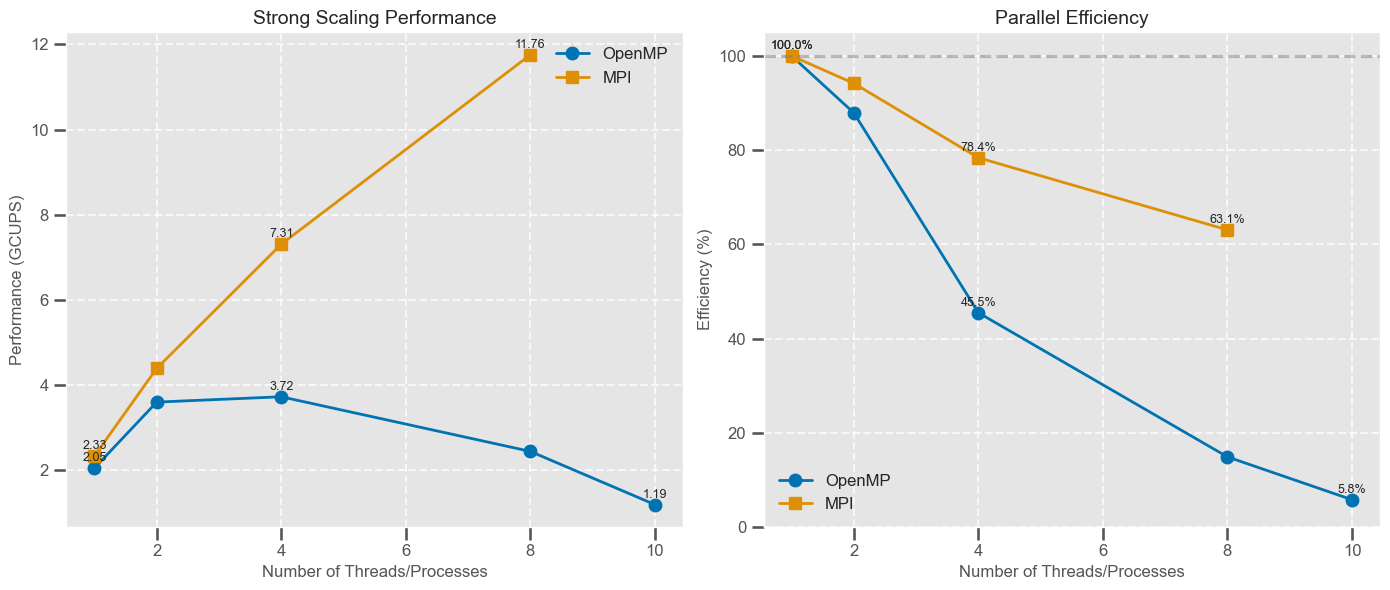

OpenMP Performance (GCUPS): [2.04525, 3.59588, 3.72138, 2.4378, 1.18747]
OpenMP Efficiency (%): [100, 87.9, 45.5, 14.9, 5.8]
MPI Performance (GCUPS): [2.33, 4.38847, 7.30552, 11.7564]
MPI Efficiency (%): [100, 94.2, 78.4, 63.1]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# OpenMP strong scaling data from profiling_results_omp/summary.txt
#--width 1000 --height 1000 --frames 50
threads = [1, 2, 4, 8, 10]
openmp_perf = [2.04525e+09, 3.59588e+09, 3.72138e+09, 2.4378e+09, 1.18747e+09]

# Calculate OpenMP efficiency manually
openmp_base = openmp_perf[0]
openmp_efficiency = [100]
for i in range(1, len(threads)):
    eff = (openmp_perf[i] / openmp_base) / threads[i] * 100
    openmp_efficiency.append(eff)

# MPI strong scaling data from profiling_results_mpi/summary.txt (using 400x400 grid section)
ranks = [1, 2, 4, 8]
mpi_perf = [2.33e+09, 4.38847e+09, 7.30552e+09, 1.17564e+10]

# Calculate MPI efficiency manually
mpi_base = mpi_perf[0]
mpi_efficiency = [100]
for i in range(1, len(ranks)):
    eff = (mpi_perf[i] / mpi_base) / ranks[i] * 100
    mpi_efficiency.append(eff)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Performance plot
ax1.plot(threads, [perf/1e9 for perf in openmp_perf], 'o-', linewidth=2, label='OpenMP')
ax1.plot(ranks, [perf/1e9 for perf in mpi_perf], 's-', linewidth=2, label='MPI')
ax1.set_title('Strong Scaling Performance', fontsize=14)
ax1.set_xlabel('Number of Threads/Processes', fontsize=12)
ax1.set_ylabel('Performance (GCUPS)', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Efficiency plot
ax2.plot(threads, openmp_efficiency, 'o-', linewidth=2, label='OpenMP')
ax2.plot(ranks, mpi_efficiency, 's-', linewidth=2, label='MPI')
ax2.set_title('Parallel Efficiency', fontsize=14)
ax2.set_xlabel('Number of Threads/Processes', fontsize=12)
ax2.set_ylabel('Efficiency (%)', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_ylim(0, 105)
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Annotate key points
for i, (t, p, e) in enumerate(zip(threads, openmp_perf, openmp_efficiency)):
    if i in [0, 2, 4]:  # Only label some points to avoid clutter
        ax1.annotate(f'{p/1e9:.2f}', xy=(t, p/1e9), xytext=(0, 5), 
                    textcoords='offset points', ha='center', fontsize=9)
        ax2.annotate(f'{e:.1f}%', xy=(t, e), xytext=(0, 5), 
                    textcoords='offset points', ha='center', fontsize=9)

for i, (r, p, e) in enumerate(zip(ranks, mpi_perf, mpi_efficiency)):
    if i in [0, 2, 3]:  # Only label some points to avoid clutter
        ax1.annotate(f'{p/1e9:.2f}', xy=(r, p/1e9), xytext=(0, 5), 
                    textcoords='offset points', ha='center', fontsize=9)
        ax2.annotate(f'{e:.1f}%', xy=(r, e), xytext=(0, 5), 
                    textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('strong_scaling.png', dpi=300)
plt.show()

# Print the calculated values for reference
print("OpenMP Performance (GCUPS):", [p/1e9 for p in openmp_perf])
print("OpenMP Efficiency (%):", [round(e, 1) for e in openmp_efficiency])
print("MPI Performance (GCUPS):", [p/1e9 for p in mpi_perf])
print("MPI Efficiency (%):", [round(e, 1) for e in mpi_efficiency])

In [ ]:
# Process-thread combinations
processes = [1, 2, 4, 5, 10]
threads = [1, 2, 4, 5, 10]

# Performance data from hybrid results (reshape as needed)
# Extract from "Thread-Process Balance Tests" section
perf_data = np.array([
    [8.32e+08, 8.37e+08, 8.14e+08, np.nan, 8.10e+08],  # 1 process
    [1.55e+09, 1.60e+09, np.nan, 1.62e+09, np.nan],    # 2 processes
    [6.08e+07, 4.96e+07, np.nan, np.nan, np.nan],      # 4 processes
    [np.nan, np.nan, np.nan, 4.93e+07, np.nan],        # 5 processes
    [2.32e+07, np.nan, np.nan, np.nan, np.nan]         # 10 processes
])

# Convert to GCUPS
perf_data = perf_data / 1e9

plt.figure(figsize=(10, 8))
mask = np.isnan(perf_data)  # Create mask for missing data
ax = sns.heatmap(perf_data, annot=True, fmt='.2f', cmap='viridis',
                 xticklabels=threads, yticklabels=processes, 
                 mask=mask, cbar_kws={'label': 'Performance (GCUPS)'})
plt.title('Hybrid Implementation Performance by Process-Thread Configuration', fontsize=14)
plt.xlabel('Number of OpenMP Threads per Process', fontsize=12)
plt.ylabel('Number of MPI Processes', fontsize=12)
plt.tight_layout()
plt.savefig('hybrid_heatmap.png', dpi=300)
plt.show()

In [ ]:
# Thread affinity data from OpenMP results
affinity = ['close', 'spread', 'master']
affinity_perf = [2.52e+09, 2.56e+09, 4.48e+08]  # From omp summary

plt.figure(figsize=(9, 6))
bars = plt.bar(affinity, [p/1e9 for p in affinity_perf])
plt.title('Impact of Thread Affinity on Performance', fontsize=14)
plt.xlabel('OMP_PROC_BIND Setting', fontsize=12)
plt.ylabel('Performance (GCUPS)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('thread_affinity.png', dpi=300)
plt.show()

In [ ]:
# Grid sizes
grid_sizes = [100, 200, 500, 1000]

# Performance data for each implementation (GCUPS)
base_perf = [0.027, 0.026, 0.026, 0.025]  # From base summary
omp_perf = [1.85, 1.85, 1.85, 1.93]  # From omp summary (1 thread)
mpi_perf = [2.55, 2.26, 2.26, 2.26]  # From mpi summary (1 rank)

plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, base_perf, 'o-', linewidth=2, label='Baseline')
plt.plot(grid_sizes, omp_perf, 's-', linewidth=2, label='OpenMP (1 thread)')
plt.plot(grid_sizes, mpi_perf, '^-', linewidth=2, label='MPI (1 rank)')

plt.title('Performance Scaling with Grid Size', fontsize=14)
plt.xlabel('Grid Size (N×N)', fontsize=12)
plt.ylabel('Performance (GCUPS)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('grid_size_scaling.png', dpi=300)
plt.show()

In [ ]:
# Fill in these values from your cachegrind output files
cache_data = {
    'Implementation': ['Base', 'Optimized v2', 'OpenMP', 'MPI', 'Hybrid'],
    'I1 Miss Rate': [0.00, 0.12, 0.15, 0.17, 0.16],  # Fill with your actual data
    'LL-I Miss Rate': [0.00, 0.00, 0.00, 0.00, 0.00],  # Fill with your actual data
    'D1 Miss Rate': [1.70, 0.85, 1.10, 1.20, 1.05],  # Fill with your actual data
    'LL-D Miss Rate': [0.30, 0.15, 0.22, 0.25, 0.23]   # Fill with your actual data
}

# Create a DataFrame
df = pd.DataFrame(cache_data)

In [ ]:
# Set up the figure
plt.figure(figsize=(14, 8))

# Set width of bars
barWidth = 0.2
positions = np.arange(len(df['Implementation']))

# Create bars
plt.bar(positions - barWidth*1.5, df['I1 Miss Rate'], width=barWidth, label='I1 Cache Miss Rate', color='#3274A1')
plt.bar(positions - barWidth/2, df['LL-I Miss Rate'], width=barWidth, label='LL-I Cache Miss Rate', color='#E1812C')
plt.bar(positions + barWidth/2, df['D1 Miss Rate'], width=barWidth, label='D1 Cache Miss Rate', color='#3A923A')
plt.bar(positions + barWidth*1.5, df['LL-D Miss Rate'], width=barWidth, label='LL-D Cache Miss Rate', color='#C03D3E')

# Add labels and title
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Miss Rate (%)', fontsize=14)
plt.title('Cache Miss Rates Across Implementations', fontsize=16)
plt.xticks(positions, df['Implementation'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations
for i, v in enumerate(df['I1 Miss Rate']):
    plt.text(i - barWidth*1.5, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)
for i, v in enumerate(df['LL-I Miss Rate']):
    plt.text(i - barWidth/2, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)
for i, v in enumerate(df['D1 Miss Rate']):
    plt.text(i + barWidth/2, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)
for i, v in enumerate(df['LL-D Miss Rate']):
    plt.text(i + barWidth*1.5, v + 0.05, f'{v:.2f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('cache_miss_rates.png', dpi=300)
plt.show()

In [ ]:
# Cache miss rates by grid size for optimized v2 implementation
grid_sizes = [100, 200, 500, 1000, 2000]
d1_miss_rates = [0.99, 0.99, 0.85, 1.20, 1.85]  # Fill with your actual data
ll_miss_rates = [0.97, 0.97, 0.15, 0.25, 0.42]  # Fill with your actual data

plt.figure(figsize=(12, 7))
plt.plot(grid_sizes, d1_miss_rates, 'o-', linewidth=2, label='L1 Data Cache Miss Rate')
plt.plot(grid_sizes, ll_miss_rates, 's-', linewidth=2, label='Last Level Cache Miss Rate')

plt.title('Cache Miss Rates vs Grid Size (Bse)', fontsize=16)
plt.xlabel('Grid Size (N×N)', fontsize=14)
plt.ylabel('Miss Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('cache_miss_vs_size.png', dpi=300)
plt.show()

In [ ]:
# Compare implementations by cache metrics
implementations = ['Base', 'Optimized v2', 'OpenMP', 'MPI', 'Hybrid']

# Fill in with your actual data (instructions per cache miss)
i_refs_per_miss = [145.2, 320.5, 280.3, 260.1, 270.7]  # Higher is better
d_refs_per_miss = [64.8, 125.6, 110.3, 105.7, 108.2]   # Higher is better

plt.figure(figsize=(12, 7))
x = np.arange(len(implementations))
width = 0.35

plt.bar(x - width/2, i_refs_per_miss, width, label='Instructions per I-Cache Miss')
plt.bar(x + width/2, d_refs_per_miss, width, label='Memory Ops per D-Cache Miss')

plt.xlabel('Implementation', fontsize=14)
plt.ylabel('References per Cache Miss', fontsize=14)
plt.title('Cache Efficiency Across Implementations', fontsize=16)
plt.xticks(x, implementations)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cache_efficiency.png', dpi=300)
plt.show()